In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 1. 강의노트 연습문제 3.2를 Python으로 구현하여 풀어라 

#### 3.2. First implement the MATLAB programs clgs, mgs, qrhouse and formQ in Python

In [2]:
def clgs(A):
    A = np.array(A,dtype=float)
    (m,n) = A.shape
    V = A.copy()
    Q = np.eye(m,n)
    R = np.zeros([n,n])
    
    for j in range(n):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i].T, A[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j]/R[j,j]
    
    return [Q,R]

In [3]:
def mgs(A):
    A = np.array(A,dtype=float)
    (m,n) = A.shape
    Q = A.copy()
    R = np.zeros([n,n])
    
    for i in range(n-1):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:n] = np.dot(Q[:,i].T, Q[:,i+1:n])
        Q[:,i+1:n] = Q[:,i+1:n] - np.dot(Q[:,i].reshape(-1,1), R[i,i+1:n].reshape(1,-1))
        
    R[n-1,n-1] = np.linalg.norm(Q[:,n-1])
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    
    return [Q,R]

In [4]:
def qrhouse(A):
    A = np.array(A,dtype=float)
    (m,n) = A.shape
    R = A.copy()
    V = np.zeros([m,n])
    
    for k in range(min(m-1,n)):
        x = R[k:m,k]
        v = x + np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x),1).reshape(-1)
        V[k:m,k] = v
        v = v.reshape(-1,1)
        R[k:m,k:n] = R[k:m,k:n] - np.dot((2*v),np.dot(v.T,R[k:m,k:n]))/np.dot(v.T,v)        
    
    R = np.triu(R[:n,:n])
        
    return [V,R]

In [5]:
def formQ(V):
    V = np.array(V, dtype=float)
    (m,n) = V.shape
    Q = np.eye(m)
    
    for j in range(min(m-2,n-1),-1,-1):
        v = V[:,j]
        Q = Q - np.dot((2*v),np.dot(v.T,Q))/np.dot(v.T,v)

    return Q

####  (a) Implement following MATLAB code in Python and test it

In [6]:
[U,X] = np.linalg.qr(np.random.randn(80,80),mode='complete')
[V,X] = np.linalg.qr(np.random.randn(80,80),mode='complete')
J = list(range(1,81))
S = np.diag(np.exp2(-1*np.array(J)))
A = np.dot(np.dot(U,S),V)
[Qc,Rc] = clgs(A)
[Qm,Rm] = mgs(A)

#### Implementing the MATLAB program semiology in Python, plot the diagonal elements r_jj produced by both computations with s_jj in one figure. 

In [7]:
def semilogy(x,y,marker,label):
    plt.scatter(x,np.log10(y), marker=marker, label=label, c='black')

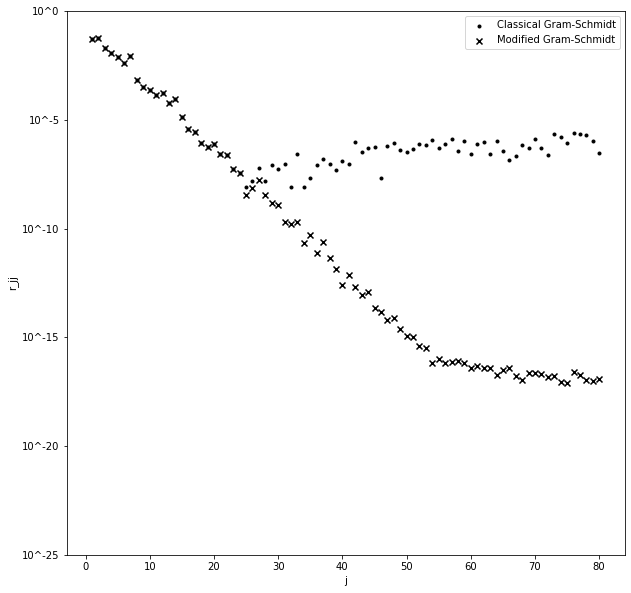

In [8]:
plt.figure(figsize=(10,10))
semilogy(J,[Rc[j,j] for j in range(80)],'.','Classical Gram-Schmidt')
semilogy(J,[Rm[j,j] for j in range(80)],'x','Modified Gram-Schmidt')
plt.xlabel('j')
plt.ylabel('r_jj')
plt.yticks(np.arange(-25,5,5),labels=['10^'+str(j) for j in range(-25,5,5)])
plt.legend(loc = 'upper right')
plt.show()

#### Which is more numerically stable, classical or modified?

####  (b) Implement following MATLAB code in Python

In [9]:
A = [[.70000,.70711],[.70001,.70711]]
[Qm,Rm] = mgs(A)
[V,R] = qrhouse(A)
Q = formQ(V)
print(np.linalg.norm(np.dot(Q.T,Q)-np.eye(2)))
print(np.linalg.norm(np.dot(Qm.T,Qm)-np.eye(2)))

8.0
3.254726094493924e-11


#### Which is more numerically stable, householder or modified?

### 2. 강의노트 연습문제 3.3을 Python으로 구현하여 풀어라 

#### Writeh a Python function that computes a reduced QR decompoistion A=QR of an mxn matrix with m>= n using Givens rotation. Turn in your codes and the results when it is applied to a matrix A you chosen arbitrarily. Your result should the same as that of the MATLAB program [Q,R]=qr(A) to verify your code

In [10]:
# my code
def gr(A):
    A = np.array(A,dtype=float)
    (m,n) = A.shape
    R = A.copy()
    Q = np.eye(m)
    
    for j in range(n):
        for i in range(m-1,j,-1):
            if R[i,j] != 0:
                cos = R[i-1,j]/np.hypot(R[i-1,j],R[i,j])
                sin = R[i,j]/np.hypot(R[i-1,j],R[i,j])
                
                G = np.eye(m)
                G[i-1,i-1] = cos
                G[i,i] = cos
                G[i-1,i] = sin
                G[i,i-1] = -1*sin
                                
                R = np.dot(G,R)
                Q = np.dot(Q,G.T)
                
    return [Q,R]

In [11]:
# results from arbitrary matrix A
A = np.array([[3,2,1],[2,-3,4],[5,0,-1],[7,4,2]])
[Q,R] = gr(A)
print('Q=', Q)
print('R=', R)
print('A=PQ :',np.allclose(A,np.dot(Q,R)))

Q= [[ 0.32163376  0.23138388  0.2007804  -0.89593552]
 [ 0.21442251 -0.81498543  0.53819658 -0.01289116]
 [ 0.53605627 -0.35993047 -0.760307   -0.07090137]
 [ 0.75047877  0.39078166  0.30325723  0.43829939]]
R= [[ 9.32737905  3.0019151   2.14422507]
 [ 0.          4.47085067 -1.88706406]
 [ 0.          0.          3.72038816]
 [ 0.          0.          0.        ]]
A=PQ : True


In [12]:
# compare with numpy.linalg.qr
q,r = np.linalg.qr(A,mode='complete')
print('Q=', q)
print('R=', r)
print('A=PQ :',np.allclose(A,np.dot(q,r)))

Q= [[-0.32163376  0.23138388  0.2007804  -0.89593552]
 [-0.21442251 -0.81498543  0.53819658 -0.01289116]
 [-0.53605627 -0.35993047 -0.760307   -0.07090137]
 [-0.75047877  0.39078166  0.30325723  0.43829939]]
R= [[-9.32737905 -3.0019151  -2.14422507]
 [ 0.          4.47085067 -1.88706406]
 [ 0.          0.          3.72038816]
 [ 0.          0.          0.        ]]
A=PQ : True


### 3. 강의노트 연습문제 4.3을 Python으로 구현하여 풀어라

In [13]:
def random_matrix(m):
    A = np.random.randn(m,m)/np.sqrt(m)
    return A

#### (a) What do the eigenvalues of a random matix look like?

In [14]:
A = random_matrix(10)
eigenvalues = np.linalg.eig(A)[0]
print(eigenvalues)
print(len(np.unique(eigenvalues)))

[-1.2782426 +0.j         -0.68317647+0.686961j   -0.68317647-0.686961j
  0.72757237+0.17757817j  0.72757237-0.17757817j  0.05860574+0.4626246j
  0.05860574-0.4626246j  -0.31031651+0.32549798j -0.31031651-0.32549798j
 -0.04489573+0.j        ]
10


#### What happens, say, if you take 100 random matrices and superimpose all their eigenvalues in a single plot?

In [15]:
def eigenvalue_plot(m, repeat):
    max = 0
    for _ in range(repeat):
        A = random_matrix(m)
        eigenvalue = np.linalg.eig(A)[0]
        plt.scatter(eigenvalue.real, eigenvalue.imag, c='b')
        temp_max = abs(eigenvalue).max()
        if temp_max > max:
            max = temp_max
    plt.title('m=%d, radius=%.3f'%(m,max))
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.show()

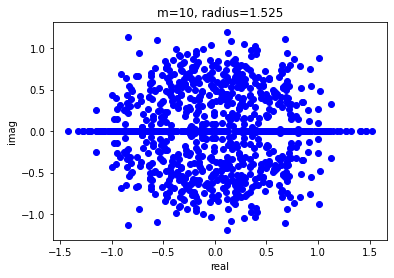

In [16]:
eigenvalue_plot(10,100)

#### If you do this for m=8,16,32,64,..., what pattern is suggested? How does the spectral radius behave as m -> infinity?

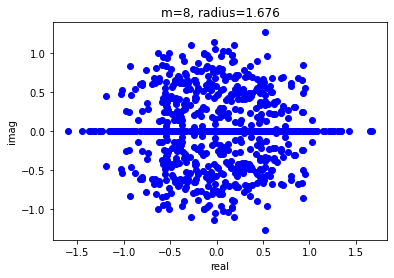

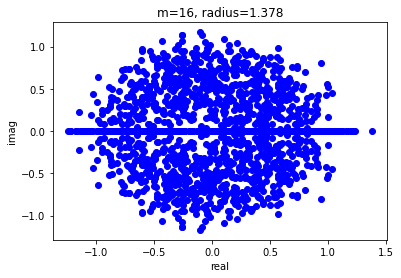

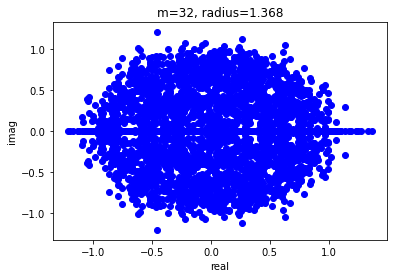

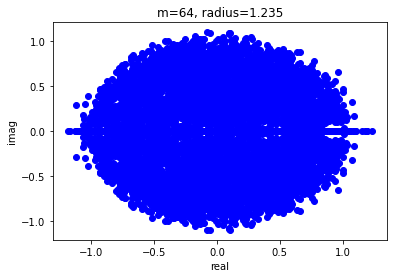

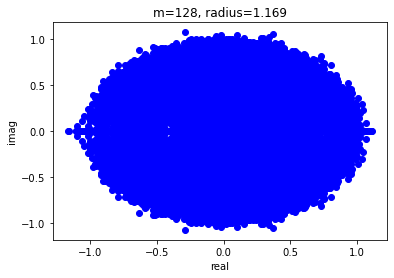

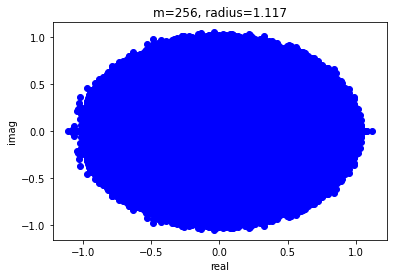

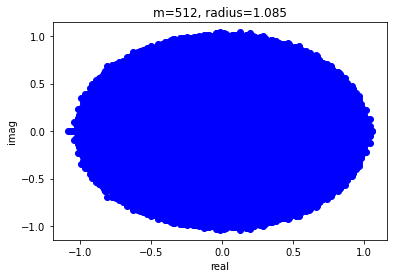

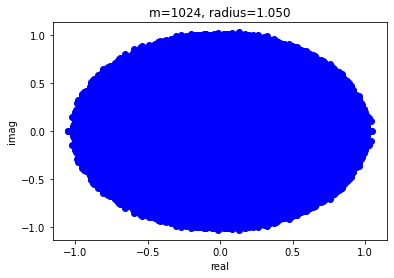

In [17]:
m = 8
repeat = 100
while m < 2000:
    eigenvalue_plot(m,repeat)
    m *= 2

#### (b) What about norms? How does the 2-norm of a random matrix behave as m -> infinity?

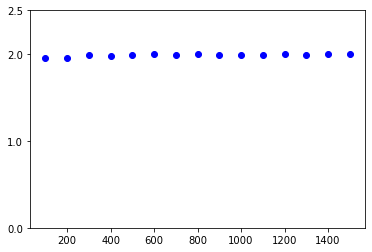

In [18]:
m = 100
for _ in range(15):
    A = random_matrix(m)
    norm = np.linalg.norm(A,2)
    plt.scatter(m, norm, c='b')
    plt.yticks([0,1.0,2.0,2.5])
    m += 100
plt.show()

#### Of course, we must have spectral radius of A <= 2-norm of A. Does this inequality appear to approach an equality as m -> infinity?

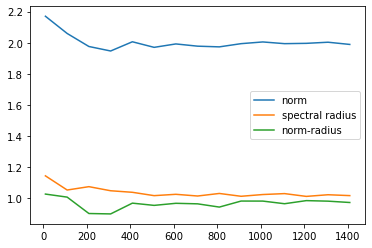

In [19]:
m_list = []
norm_list = []
radius_list = []
difference_list = []
for m in range(10, 1500, 100):
    A = random_matrix(m)
    norm = np.linalg.norm(A,2)
    ev = np.linalg.eig(A)[0]
    spectral_radius = abs(ev).max()
    m_list.append(m)
    norm_list.append(norm)
    radius_list.append(spectral_radius)
    difference_list.append(norm-spectral_radius)
plt.plot(m_list, norm_list, label='norm')
plt.plot(m_list, radius_list, label='spectral radius')
plt.plot(m_list, difference_list, label='norm-radius')
plt.legend(loc=0)
plt.show()

#### (c) What about condition numbers - or more simply, the smallest singular value?

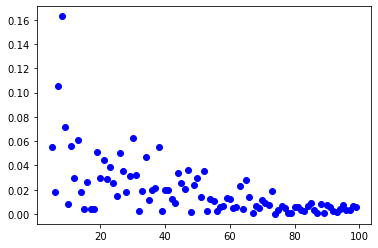

In [20]:
for m in range(5,100):
    A = random_matrix(m)
    smallest_ev = np.linalg.norm(A,-2)
    plt.scatter(m, smallest_ev, c='b')
plt.show()

#### What proportions of random matrices in m x m shape seem to have smallest singular value<=2^-1,4^-1,8^-1,...? In other words, what does the tail of the probability distribution of the smallest singular value look like? How does the scale of all this change with m?

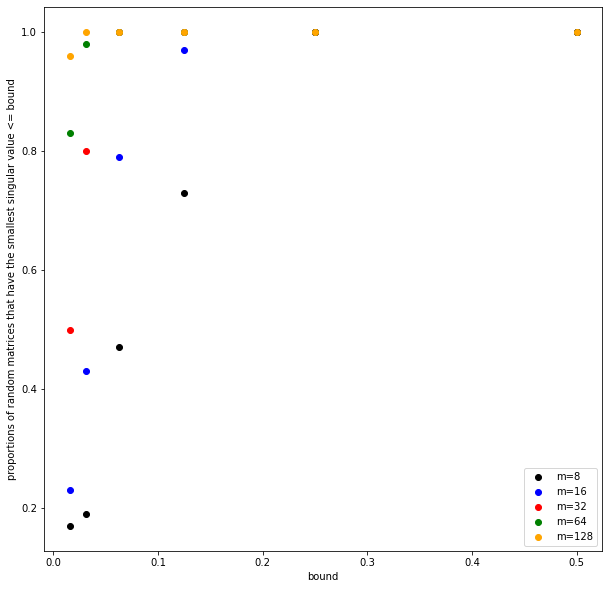

In [21]:
plt.figure(figsize=(10,10))
color = ['black','blue','red','green','orange']
for i in range(3,8):
    m = 2**i
    per_list = []
    bound_list = []
    for j in range(1,7):
        count = 0
        bound = 2**(-1*j)
        for _ in range(100):
            A = random_matrix(m)
            smallest_ev = np.linalg.norm(A,-2)
            if smallest_ev < bound:
                count += 1
        per = count/100
        per_list.append(per)
        bound_list.append(bound)
    plt.scatter(bound_list,per_list, c=color[i-3],label='m='+str(m))
plt.legend(loc=0)
plt.xlabel('bound')
plt.ylabel('proportions of random matrices that have the smallest singular value <= bound')
plt.show()

#### (d) How do the answers to (a)-(c) above change if we consider random triangular matrices instead of full matrices?

In [22]:
def upper_tri_matrix(m):
    A = random_matrix(m)
    return np.triu(A)

In [23]:
def eigenvalue_plot2(m, repeat):
    max = 0
    for _ in range(repeat):
        A = upper_tri_matrix(m)
        eigenvalue = np.linalg.eig(A)[0]
        plt.scatter(eigenvalue.real, eigenvalue.imag, c='b')
        temp_max = abs(eigenvalue).max()
        if temp_max > max:
            max = temp_max
    plt.title('m=%d, radius=%.3f'%(m,max))
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.show()

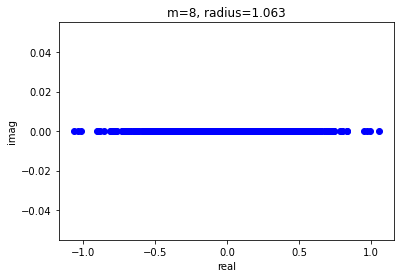

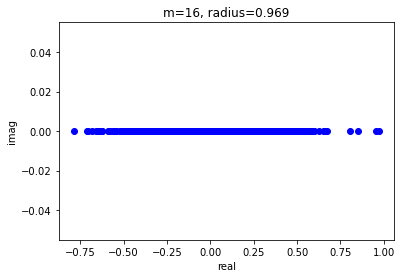

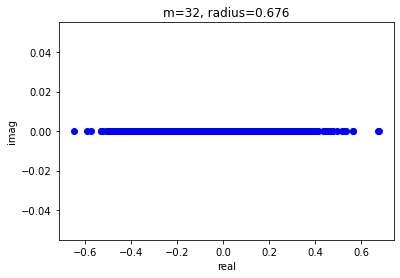

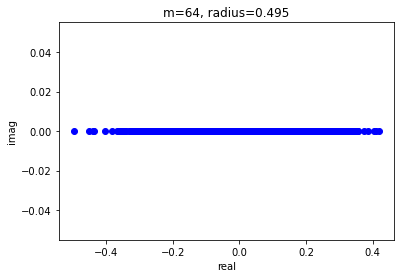

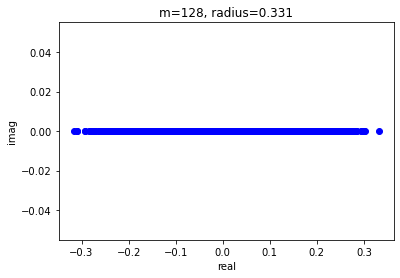

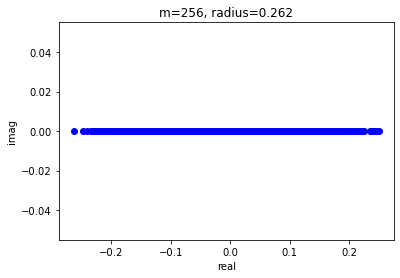

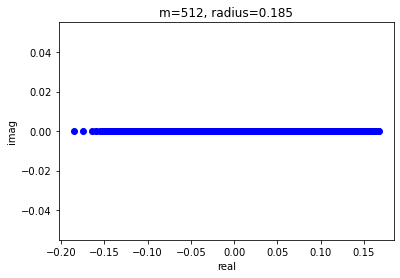

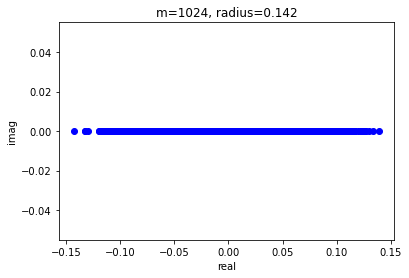

In [24]:
m = 8
repeat = 100
while m<2000:
    eigenvalue_plot2(m,repeat)
    m *= 2

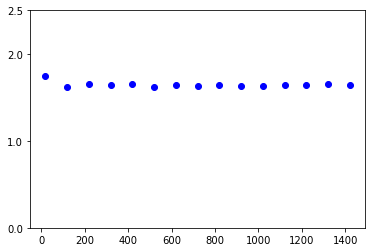

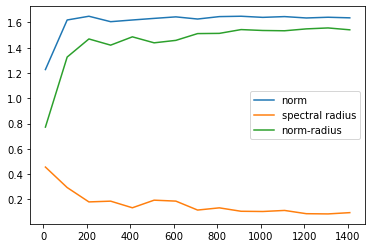

In [25]:
m = 20
for _ in range(15):
    A = upper_tri_matrix(m)
    norm = np.linalg.norm(A,2)
    plt.scatter(m, norm, c='b')
    plt.yticks([0,1.0,2.0,2.5])
    m += 100
plt.show()

m_list = []
norm_list = []
radius_list = []
difference_list = []
for m in range(10, 1500, 100):
    A = upper_tri_matrix(m)
    norm = np.linalg.norm(A,2)
    ev = np.linalg.eig(A)[0]
    spectral_radius = abs(ev).max()
    m_list.append(m)
    norm_list.append(norm)
    radius_list.append(spectral_radius)
    difference_list.append(norm-spectral_radius)
plt.plot(m_list, norm_list, label='norm')
plt.plot(m_list, radius_list, label='spectral radius')
plt.plot(m_list, difference_list, label='norm-radius')
plt.legend(loc=0)
plt.show()

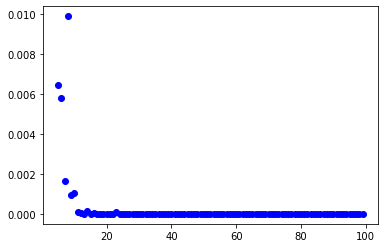

In [26]:
for m in range(5,100):
    A = upper_tri_matrix(m)
    smallest_ev = np.linalg.norm(A,-2)
    plt.scatter(m, smallest_ev, c='b')
plt.show()

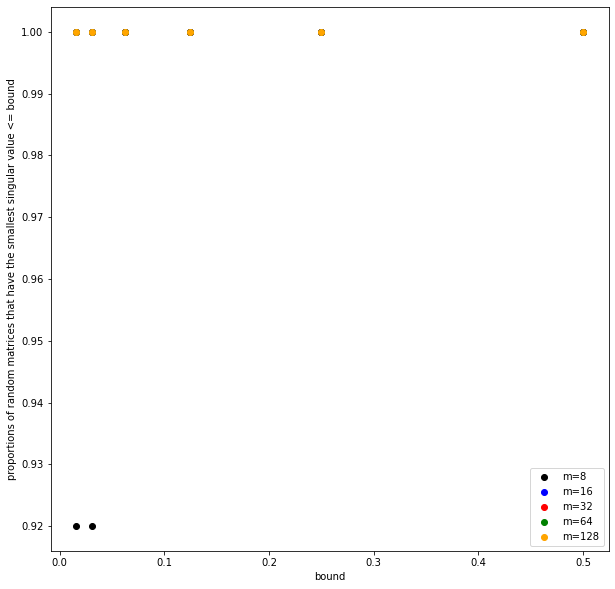

In [27]:
plt.figure(figsize=(10,10))
color = ['black','blue','red','green','orange']
for i in range(3,8):
    m = 2**i
    per_list = []
    bound_list = []
    for j in range(1,7):
        count = 0
        bound = 2**(-1*j)
        for _ in range(100):
            A = upper_tri_matrix(m)
            smallest_ev = np.linalg.norm(A,-2)
            if smallest_ev < bound:
                count += 1
        per = count/100
        per_list.append(per)
        bound_list.append(bound)
    plt.scatter(bound_list,per_list, c=color[i-3],label='m='+str(m))
plt.legend(loc=0)
plt.xlabel('bound')
plt.ylabel('proportions of random matrices that have the smallest singular value <= bound')
plt.show()

### 4. 강의노트 연습문제 4.6을 Python으로 구현하여 풀어라 

In [28]:
m=50
n=12

t = np.linspace(0,1,m)
A = np.vander(t, increasing=True)[:,:n]
b = np.cos(4*t)

#### (a) Formation and solution of the normal equations, using Python's

In [29]:
x1 = np.linalg.lstsq(np.dot(A.T,A),np.dot(A.T,b),rcond=None)[0]
print(x1)

[ 1.00000001e+00 -2.45633255e-06 -7.99990600e+00 -1.41625078e-03
  1.06777722e+01 -5.12585461e-02 -5.54137654e+00 -2.68242248e-01
  1.92094814e+00 -1.60950820e-01 -3.04725628e-01  7.55145358e-02]


#### (b) QR factorization computed by mgs

In [30]:
[mgsQ,mgsR] = mgs(A)
x2= np.linalg.lstsq(mgsR,np.dot(mgsQ.T,b),rcond=None)[0]
print(x2)

[ 1.00000000e+00 -7.80741851e-07 -7.99996781e+00 -5.16377008e-04
  1.06709431e+01 -2.06445282e-02 -5.62772565e+00 -1.10758970e-01
  1.73549472e+00 -2.48104577e-02 -3.61374792e-01  8.57179143e-02]


#### (c) QR factorization computed by qrhouse

In [31]:
def Qtb(V,b):
    V = np.array(V, dtype=float)
    (m,n) = V.shape
    for j in range(min(m-1,n)):
        v = V[j:m,j]
        b[j:m] = b[j:m] - np.dot((2*v),np.dot(v.T,b[j:m]))/np.dot(v.T,v)
    c=b
    return c

In [32]:
[qrhV,qrhR] = qrhouse(A)
c = Qtb(qrhV,b)
qrhR2 = np.zeros_like(A)
n = qrhR.shape[1]
qrhR2[:n,:n] = qrhR
x3 = np.linalg.lstsq(qrhR2,c,rcond=None)[0]
print(x3)

[ 1.00000000e+00 -4.22743069e-07 -7.99998124e+00 -3.18763241e-04
  1.06694308e+01 -1.38202882e-02 -5.64707563e+00 -7.53160253e-02
  1.69360696e+00  6.03210805e-03 -3.74241703e-01  8.80405760e-02]


In [34]:
m=50
n=12

t = np.linspace(0,1,m)
A = np.vander(t, increasing=True)[:,:n]
b = np.cos(4*t)

#### (d) QR factorization computed by Python's qr 

In [35]:
[qrQ,qrR] = np.linalg.qr(A, mode='complete')
x4 = np.linalg.lstsq(qrR,np.dot(qrQ.T,b),rcond=None)[0]
print(x4)

[ 1.00000000e+00 -4.22743496e-07 -7.99998124e+00 -3.18763395e-04
  1.06694308e+01 -1.38202922e-02 -5.64707562e+00 -7.53160420e-02
  1.69360698e+00  6.03209551e-03 -3.74241698e-01  8.80405752e-02]


#### (e) x = A\b

In [36]:
x5 = np.linalg.lstsq(A,b,rcond=None)[0]
print(x5)

[ 1.00000000e+00 -4.22743485e-07 -7.99998124e+00 -3.18763392e-04
  1.06694308e+01 -1.38202922e-02 -5.64707562e+00 -7.53160422e-02
  1.69360698e+00  6.03209519e-03 -3.74241698e-01  8.80405751e-02]


#### (f) SVD, using Python's svd

In [37]:
u,s,v = np.linalg.svd(A)
S = np.zeros_like(A)
n = S.shape[1]
S[:n,:n] = np.diag(s)
vx = np.linalg.lstsq(S, np.dot(u.T,b),rcond=None)[0]
x6 = np.dot(v.T,vx)
print(x6)

[ 1.00000000e+00 -4.22743493e-07 -7.99998124e+00 -3.18763399e-04
  1.06694308e+01 -1.38202924e-02 -5.64707562e+00 -7.53160431e-02
  1.69360698e+00  6.03209454e-03 -3.74241698e-01  8.80405751e-02]


#### (g) The above calculation will produce six lists of 12 coefficients. In each list, shade with red pen the digits that appear to be wrong (affected by rounding error). Comment on what differences you observe. Do the normal equations exhibit instability? 

In [38]:
for i in range(12):
    print('a'+str(i))
    print(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i])

a0
1.0000000081944986 1.0000000022190896 1.0000000009966103 1.0000000009966077 1.0000000009966081 1.0000000009966077
a1
-2.4563325496005556e-06 -7.807418512183687e-07 -4.227430694112825e-07 -4.227434959022253e-07 -4.227434851014321e-07 -4.227434929053396e-07
a2
-7.9999060048939095 -7.999967813315545 -7.999981235684913 -7.999981235672199 -7.999981235672495 -7.999981235671994
a3
-0.0014162507843929761 -0.0005163770082697104 -0.0003187632413670454 -0.0003187633945796351 -0.00031876339158229416 -0.00031876339871371294
a4
10.67777218620952 10.670943116386704 10.669430795959826 10.669430796958736 10.669430796945635 10.669430796995211
a5
-0.051258546104815506 -0.02064452821298329 -0.013820288228292501 -0.013820292181222995 -0.013820292160504002 -0.013820292361514316
a6
-5.541376537336692 -5.6277256510837885 -5.647075626761634 -5.647075616719366 -5.64707561668884 -5.6470756161748215
a7
-0.26824224768782184 -0.11075896950355923 -0.07531602527938 -0.07531604203205979 -0.07531604221878428 -0.0753

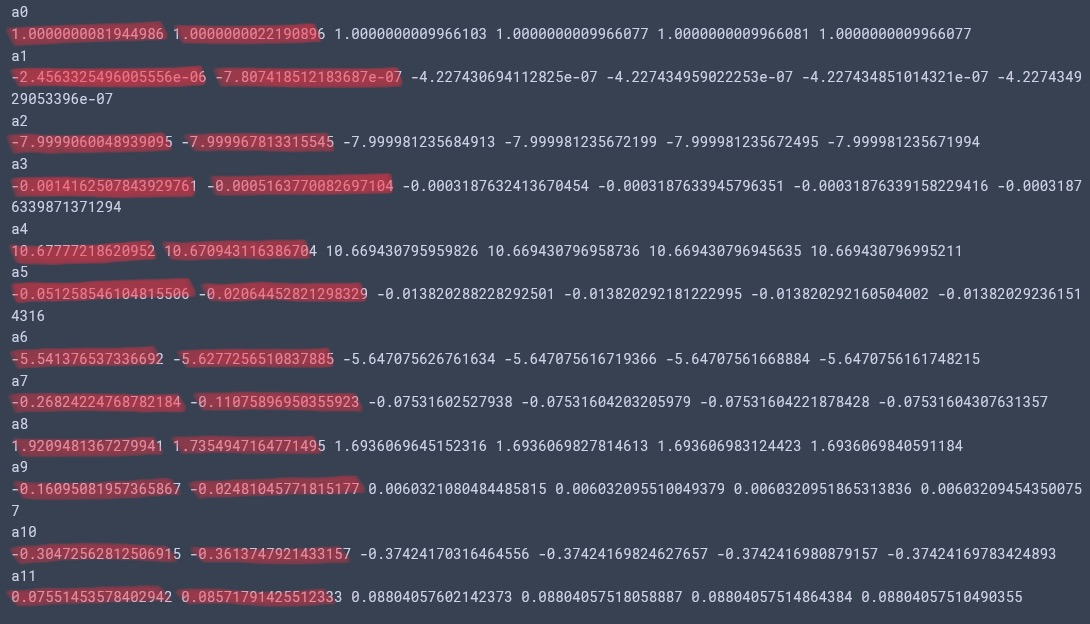

In [39]:
from IPython.display import Image
Image("image.jpg")